In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import h5py

In [6]:
fly_selected_list = ['nsyb-G7f-rAch1h/20230417-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230420-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230420-nsyb-G7f-rAch1h/fly3/data_motion',
                     'nsyb-G7f-rAch1h/20230428-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-rAch1h/20230507-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-rAch1h/20230510-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-rAch1h/20230510-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230511-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230511-nsyb-G7f-rAch1h/fly3/data_motion',
                     'nsyb-G7f-rAch1h/20230515-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230429-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230506-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230513-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230513-nsyb-G7f-r5HT1.0/fly2/data_motion',
                     'nsyb-G7f-r5HT1.0/20230516-nsyb-G7f-r5HT1.0/fly2/data_motion',
                     'nsyb-G7f-r5HT1.0/20230516-nsyb-G7f-r5HT1.0/fly4/data_motion',
                     'nsyb-G7f-r5HT1.0/20230517-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230601-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230601-nsyb-G7f-r5HT1.0/fly3/data_motion',
                     'nsyb-G7f-r5HT1.0/20230603-nsyb-G7f-r5HT1.0/fly1/data_motion']
stim = np.array([3,1,2,3,2,1,3,1,2,1,2,3,1,2,3,2,3,1,3,2,1,2,3,1,2,3,1,2,1,3,2,3,1,2,3,1,3,1,2,3,1,2,3,2,1,2,1,3,2,1,3,1,2,3,1,2,3,2,1,3,1,2,3,2,1,3,1,3,2,3,2,1,3,2,1,3,1,2,3,2,1,3,1,2,3,2,1,2,3,1,
                 3,1,2,3,1,2,3,2,1,2,3,1,2,1,3,2,1,3,1,3,2,3,1,2,1,2,3,2,3,1,2,3,1,3,2,1,2,3,1,2,1,3,1,2,3,2,3,1,2,1,3,1,3,2,3,1,2,1,2,3,2,1,3,1,2,3,2,3,1,3,1,2,1,3,2,1,3,2,3,1,2,3,2,1,2,1,3,1,2,3])
the_color = ['royalblue','firebrick','darkorange']

In [7]:
file_save_path = 'motion_analysis'
# motion data
motion_result_path = '../../../results/3.odor_random_90_times_OCT_MCH_EA_new'
filename = 'pca_components.npy'
motion_filename = 'fly_trace_diff_adjusted.mat'
score_filename = 'pca_transformed.npy'
stim_selected = 10
frame_rate_neural = 15/13
win_stim = 5 #s
if_save = False

# savepath
neural_result_path = '../results'
the_save_path = os.path.join(neural_result_path,file_save_path,'3_motion_pca')
folder = os.path.exists(the_save_path)
if not folder:
    os.makedirs(the_save_path)

win_stim_frame = int(win_stim*frame_rate_neural)

(50, 8991)
(111, 81, 227220)
(50, 111, 81)
(15, 180, 50)


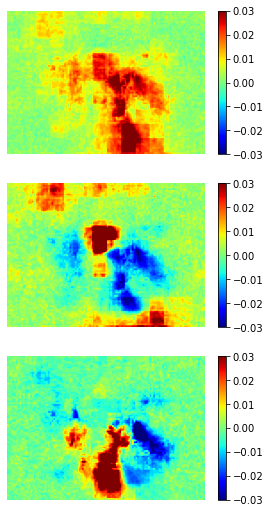

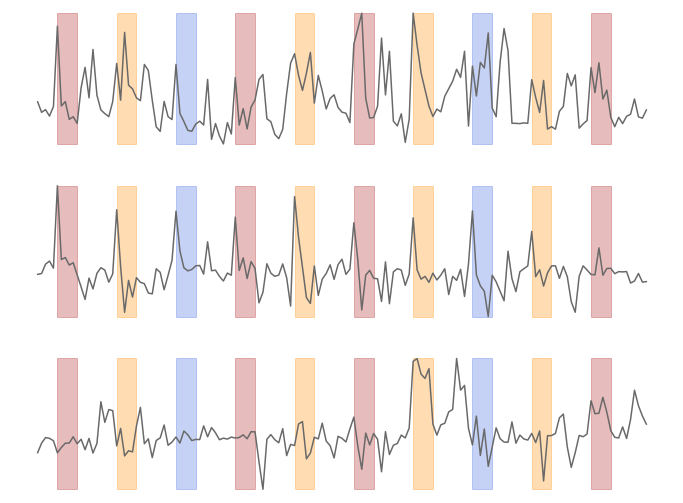

(50, 8991)
(111, 81, 246486)
(50, 111, 81)
(15, 180, 50)


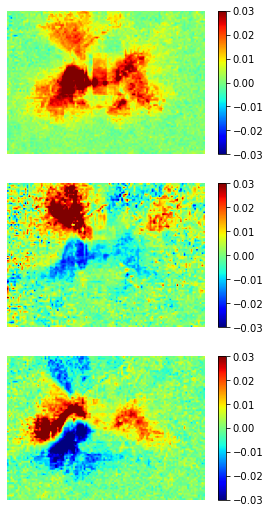

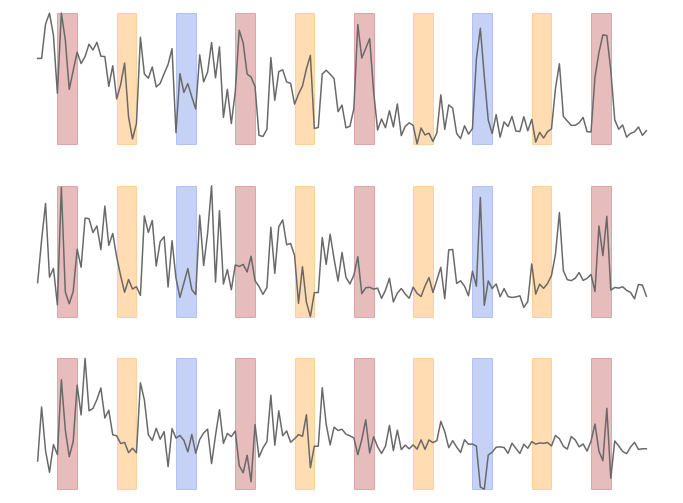

(50, 9191)
(101, 91, 248835)
(50, 101, 91)
(15, 180, 50)


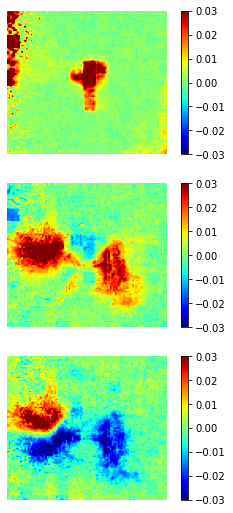

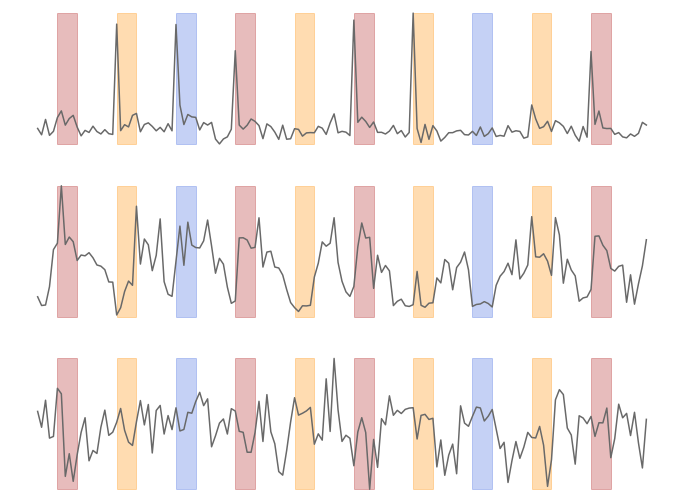

(50, 12221)


In [8]:
for i_fly in range(len(fly_selected_list)):
    fly_selected = fly_selected_list[i_fly]
    data_coef = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename))
    print(np.shape(data_coef))
    data = h5py.File(os.path.join(motion_result_path,fly_selected,motion_filename))
    data_motion = np.squeeze(data['motion'])
    print(np.shape(data_motion))
    data_coef = data_coef.reshape((-1,np.size(data_motion,0),np.size(data_motion,1)),order = 'F')
    print(np.shape(data_coef))
    data_pc = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,score_filename))
    print(np.shape(data_pc))
    # 1-weight
    plt.figure(figsize = (5,9))
    for i in range(3):
        plt.subplot(3,1,i+1)
        a = np.squeeze(data_coef[i,:,:])
        a = np.transpose(a,[1,0])
        plt.imshow(a,aspect = 1,cmap = 'jet',vmin = -0.03,vmax = 0.03)
        plt.colorbar()
        plt.axis('off')
    if if_save:
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.savefig(the_save_path + '/' + 'fly'+str(i_fly)+'.png',dpi = 300,bbox_inches = 'tight')
        plt.savefig(the_save_path + '/' + 'fly'+str(i_fly)+'.pdf',dpi = 300,bbox_inches = 'tight')
    plt.show()
    # 2-dynamics
    plt.figure(figsize=(12,9))
    for i in range(3):
        plt.subplot(3,1,i+1)
        a = np.squeeze(data_pc[:,stim_selected-1:stim_selected+10,i])
        stim_label = np.zeros_like(a)
        for j in range(np.size(a,1)):
            stim_label[range(win_stim_frame),j] = stim[stim_selected-1+j]
        a = a.reshape(-1,order = 'F')
        a = (a-np.min(a))/(np.max(a)-np.min(a))
        stim_label = stim_label.reshape(-1,order = 'F')
        a = a[10:]
        stim_label = stim_label[10:]
        ymin = 0
        ymax = 1
        for j in range(len(stim_label)):
            if stim_label[j]>0 and stim_label[j-1]==0:
                plt.fill([j,j,j+win_stim_frame,j+win_stim_frame],[ymin,ymax,ymax,ymin],color = the_color[int(stim_label[j]-1)],alpha=0.3)
        plt.plot(a,color = 'dimgrey')
        plt.axis('off')
    if if_save:
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.savefig(the_save_path + '/' + 'fly'+str(i_fly)+'_pc.png',dpi = 300,bbox_inches = 'tight')
        plt.savefig(the_save_path + '/' + 'fly'+str(i_fly)+'_pc.pdf',dpi = 300,bbox_inches = 'tight')
    plt.show()